<a href="https://colab.research.google.com/github/abdinegara783/FindIT2023/blob/Experiment/FIND_IT_UGM_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

# Import Library/Package

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import Dataset

In [6]:
#Path from Dataset
TrainingFeatures_path='/content/drive/MyDrive/DataFinditUGM/training_set_features.csv'
TrainingLabels_path='/content/drive/MyDrive/DataFinditUGM/training_set_labels.csv'

##Preprocessing TrainingFeatue_path

In [8]:
# Membaca file CSV sebagai DataFrame
#Reading the TrainingFeatures CSV file as DataFrame
df_TrainingFeatures = pd.read_csv(TrainingFeatures_path)

# shows 5 first row from DataFrame
df_TrainingFeatures.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [20]:
#shows how many feature are there
print('This is the feature from datasets:\n{}'.format(df_TrainingFeatures.columns.tolist()))
print('\nThis datasets has {} Feature'.format(len(df_TrainingFeatures.columns)))

This is the feature from datasets:
['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'household_adults', 'household_children', 'employment_industry', 'employment_occupation']

This datasets has 36 Feature


In [33]:
# Mengecek apakah ada nilai yang hilang pada setiap kolom
missing_data = df_TrainingFeatures.isna().any(axis=0)
missing_data= missing_data[missing_data == True].index.tolist()
# Mencetak nama kolom yang memiliki nilai hilang
print("Kolom dengan nilai hilang: {}".format(missing_data))


Kolom dengan nilai hilang: ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'education', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'household_adults', 'household_children', 'employment_industry', 'employment_occupation']


In [38]:
missing_data[0]

'h1n1_concern'

In [39]:
# Melihat baris yang hilang dari kolom tertentu
def find_missing_rows(df, column_name):
    # Mencari baris yang memiliki nilai hilang pada kolom tertentu
    missing_data = df[column_name].isna()
    missing_rows = df[missing_data]
    missing_indices = missing_rows.index.tolist()
    return missing_indices
find_missing_rows(df_TrainingFeatures,missing_data[0])

[44,
 96,
 150,
 411,
 758,
 1231,
 1838,
 2101,
 2301,
 2327,
 3354,
 3547,
 3573,
 3619,
 3900,
 4365,
 4530,
 4765,
 4871,
 5107,
 5216,
 5616,
 5750,
 6064,
 6270,
 6279,
 7422,
 7622,
 7710,
 8708,
 9458,
 10426,
 10517,
 11032,
 11455,
 11750,
 11897,
 12629,
 12661,
 12751,
 12827,
 13001,
 13140,
 13459,
 13843,
 14133,
 14147,
 14254,
 14415,
 14833,
 15277,
 15468,
 15718,
 15823,
 16205,
 16408,
 17210,
 17862,
 18052,
 18386,
 18478,
 18488,
 18714,
 19440,
 19687,
 19780,
 21169,
 21213,
 21269,
 21332,
 21505,
 21701,
 22344,
 22698,
 23118,
 23289,
 23319,
 23877,
 24544,
 24759,
 24967,
 25075,
 25148,
 25154,
 25244,
 25302,
 25419,
 25788,
 25883,
 25948,
 26358,
 26471]

In [43]:
df_TrainingFeatures.iloc[44, 1]

nan

In [26]:
# Memeriksa tipe data dari variabel missing_data
print(df_TrainingFeatures.dtypes)

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [27]:
# Memilih kolom-kolom DataFrame yang memiliki tipe data numerik
df_numerik = df_TrainingFeatures.select_dtypes(include=['int64', 'float64'])

# Memeriksa DataFrame hasil pemilihan
print(df_numerik.head())

   respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0               

In [28]:
# Melihat jumlah nilai unik dalam setiap kolom
print(df_numerik.nunique())

respondent_id                  26707
h1n1_concern                       4
h1n1_knowledge                     3
behavioral_antiviral_meds          2
behavioral_avoidance               2
behavioral_face_mask               2
behavioral_wash_hands              2
behavioral_large_gatherings        2
behavioral_outside_home            2
behavioral_touch_face              2
doctor_recc_h1n1                   2
doctor_recc_seasonal               2
chronic_med_condition              2
child_under_6_months               2
health_worker                      2
health_insurance                   2
opinion_h1n1_vacc_effective        5
opinion_h1n1_risk                  5
opinion_h1n1_sick_from_vacc        5
opinion_seas_vacc_effective        5
opinion_seas_risk                  5
opinion_seas_sick_from_vacc        5
household_adults                   4
household_children                 4
dtype: int64


<ipython-input-48-a36588e3c7e6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_TrainingFeatures.corr()


<Axes: >

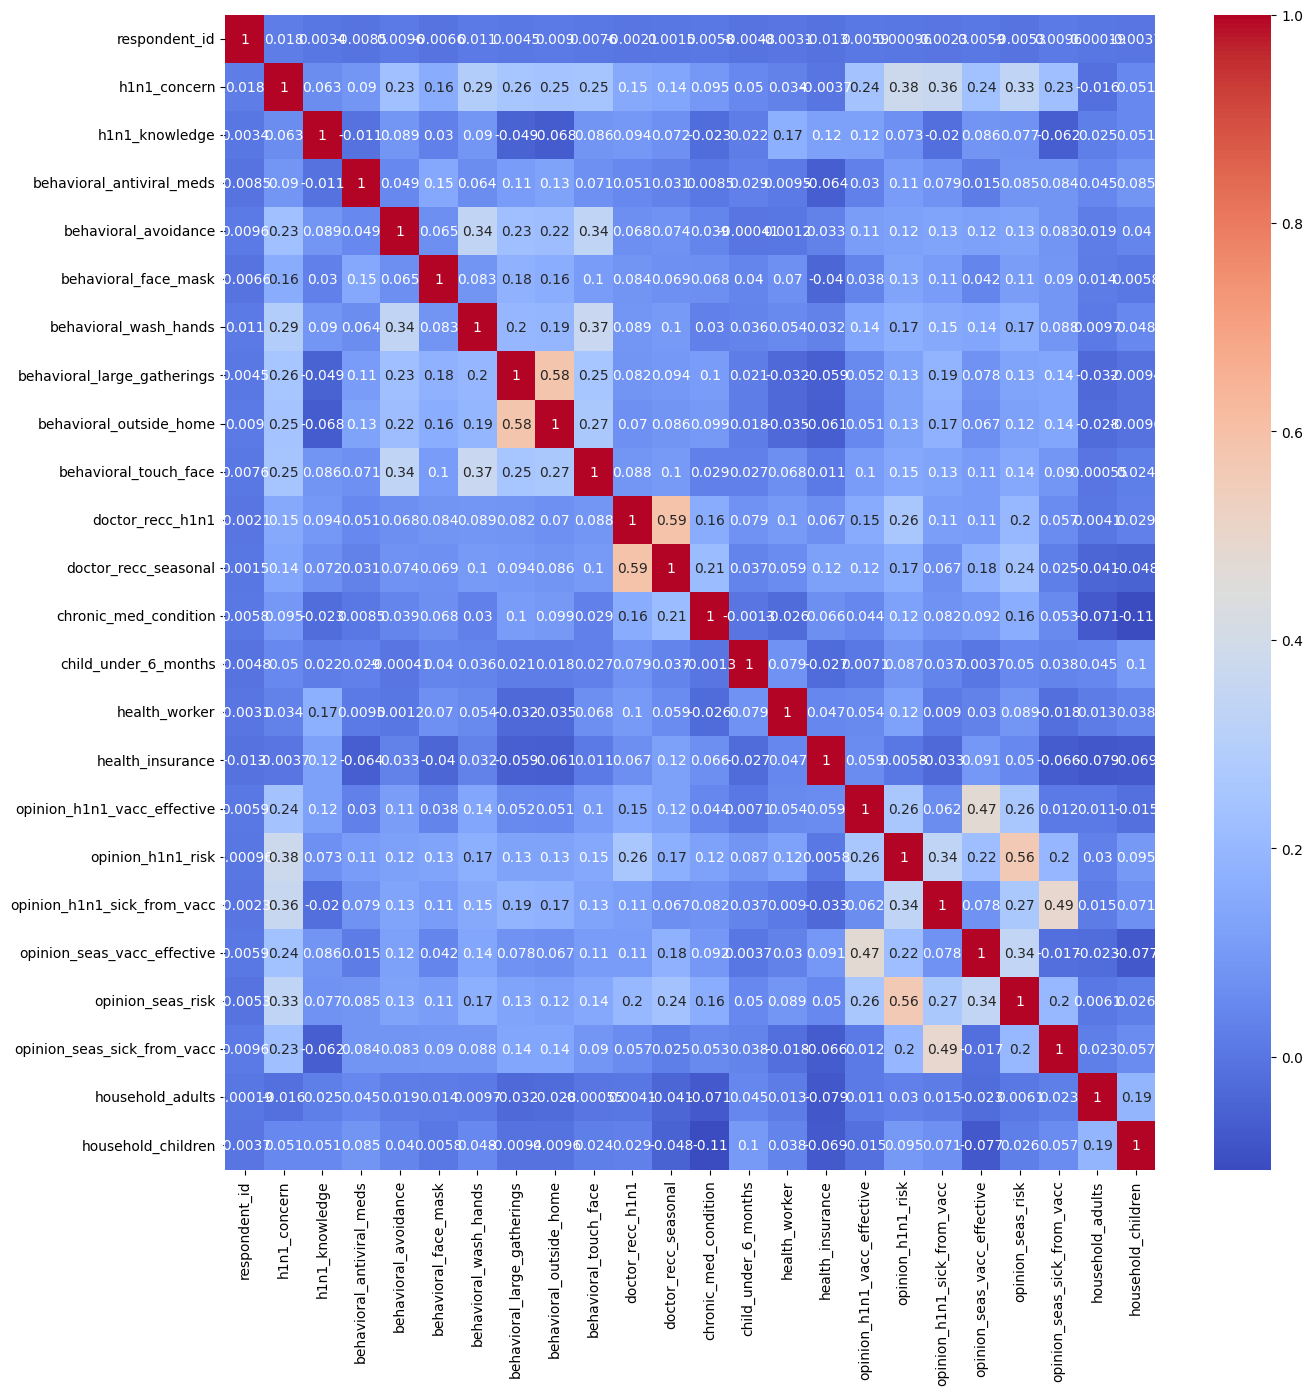

In [48]:
# create correlation matrix
corr = df_TrainingFeatures.corr()
# Membuat heatmap
fig, ax = plt.subplots(figsize=(15, 15)) # menambahkan figsize
sns.heatmap(corr, cmap='coolwarm', annot=True, ax=ax)



# EDA (Explanatory Data Analysis)

# Feature Enginering

# Feature Selection

# Modeling

# Evaluating